In [2]:
!git clone -b predict https://github.com/K4TEL/geo-twitter.git

Cloning into 'geo-twitter'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 323 (delta 7), reused 21 (delta 4), pack-reused 297
Receiving objects: 100% (323/323), 121.97 MiB | 30.60 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [1]:
! pip install -r /content/geo-twitter/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import sys
sys.path.append('/content/geo-twitter')

from text_result import *

In [3]:
hub_model = 'k4tel/geo-bert-multilingual'
base_model = "bert-base-multilingual-cased"
use_pipeline = True

In [4]:
model_wrapper = load_model(base_model, hub_model, use_pipeline)

MODEL	Initializing BERT Regression model for 5 outcome(s)
MODEL	Text features:	NON-GEO + GEO-ONLY
MODEL	Coordinates:	10
MODEL	Weights:	5
MODEL	Covariances:	5	matrix type:	spher
MODEL	Original model to load:	bert-base-multilingual-cased
MODEL	Key feature 	NON-GEO outputs:	20
MODEL	Minor feature	GEO-ONLY outputs:	3


LOAD	Loading HF model from k4tel/geo-bert-multilingual


In [5]:
text = "CIA and FBI can track anyone, and you willingly give the data away"
filter = True

In [14]:
result = text_prediction(model_wrapper, text, use_pipeline, filter)

ind = np.argwhere(np.round(result.weights[0, :] * 100, 2) > 0)
significant = result.means[0, ind].reshape(-1, 2)
weights = result.weights[0, ind].flatten()

sig_weights = weights[weights > 0]

print(f"RESULT\t{len(sig_weights)} significant prediction outcome(s):")
for i in range(len(sig_weights)):
    point = f"lon: {'  lat: '.join(map(str, significant[i]))}"
    weight = str(np.round(sig_weights[i] * 100, 2))
    print(f"\tOut {i + 1}\t{weight}%\t-\t{point}")

TEXT	Filtering text: CIA and FBI can track anyone, and you willingly give the data away
RESULT	Post-processing raw model outputs: tensor([[-6.0516e+01,  2.5569e+01, -7.9416e+01,  3.6469e+01, -8.0159e+01,
          3.5575e+01,  1.9179e+01,  3.2108e+01, -7.4642e+01,  7.3557e+00,
         -1.4772e+01,  4.7532e+00,  3.3666e+00, -1.5320e+01, -1.5556e+01,
         -1.3382e-01,  5.2191e+01, -5.1923e+00,  1.5358e+02, -1.0547e+02]])
RESULT	Sorting all outputs for 5 outcomes by probabilistic weights
RESULT	2 significant prediction outcome(s):
	Out 1	80.0%	-	lon: -79.41557312011719  lat: 36.46946716308594
	Out 2	20.0%	-	lon: -80.15892791748047  lat: 35.574649810791016


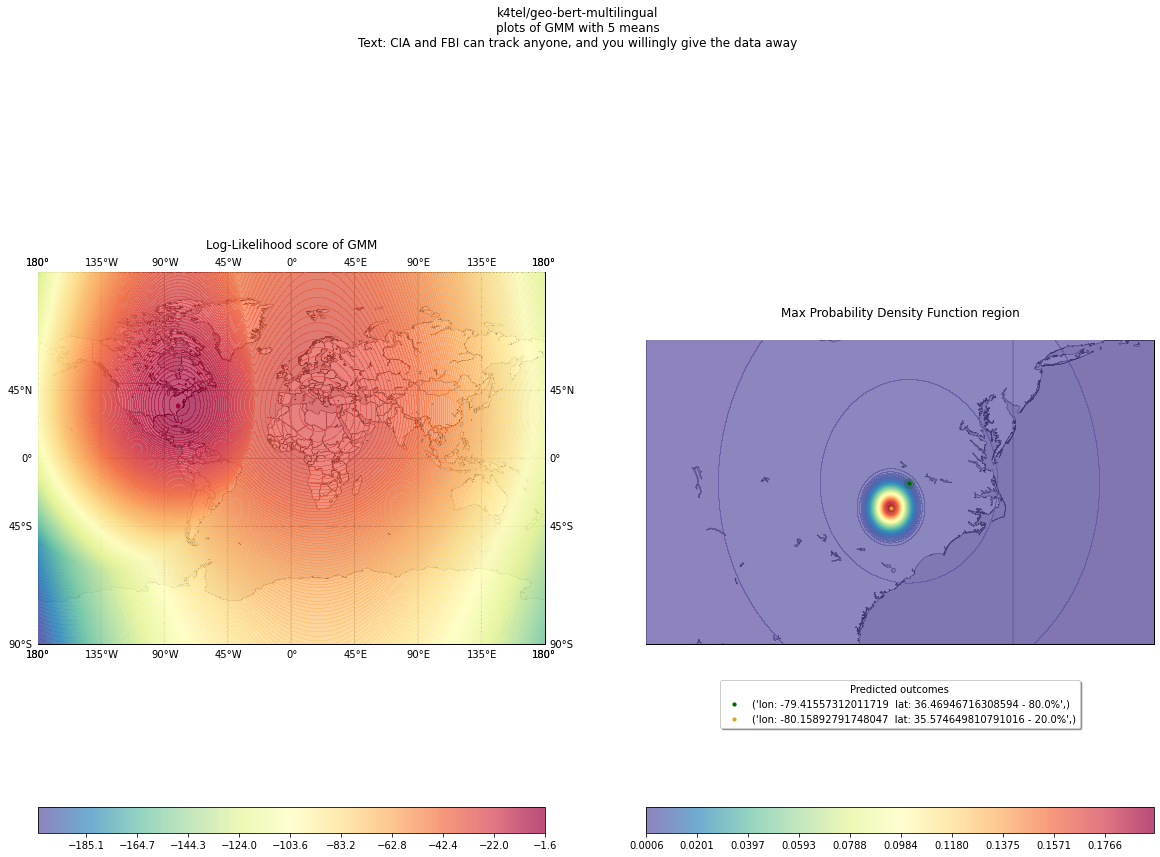

In [15]:
visual = ResultVisuals(result)
visual.text_map_result()